In [1]:
######## Package setup ########
import sys
sys.path.insert(0,'..')

In [2]:
from earth_data_plot import distribution_plot, logged_distribution_plot, correlation_plot
from sklearn import preprocessing

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 
 
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

In [5]:
######## Read Data ########
df = pd.read_csv("OLIVINES.csv", encoding = 'unicode_escape')
df.head()

,CITATION,SAMPLE NAME,TECTONIC SETTING,LOCATION,LOCATION COMMENT,LATITUDE (MIN.),LATITUDE (MAX.),LONGITUDE (MIN.),LONGITUDE (MAX.),LAND/SEA (SAMPLING),...,LAIHUNITE(MOL%),LARNITE(MOL%),LIEBENBERGITE(MOL%),MONTICELLITE(MOL%),ORTHOCLASE(MOL%),TEPHROITE(MOL%),WOLLASTONITE(MOL%),AGE(KA),AGE(MA),Unnamed: 371
0,[5] GARCIA M. O. (1996),samp. UNIT45,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[5] GARCIA M. O. (1996),samp. UNIT45,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[5] GARCIA M. O. (1996),samp. UNIT45,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[5] GARCIA M. O. (1996),samp. UNIT49,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[5] GARCIA M. O. (1996),samp. UNIT49,OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / MAUNA KEA / SHIELD...,HILO DRILL HOLE HSDP-1 CORE,19.74,19.74,-155.05,-155.05,subaerial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
num_cols = ['MGO(WT%)','SIO2(WT%)','FEOT(WT%)','CAO(WT%)','MNO(WT%)',
            'NIO(WT%)','AL2O3(WT%)','CR2O3(WT%)','TIO2(WT%)','NA2O(WT%)',
            'K2O(WT%)','NI(PPM)','P2O5(WT%)']
df[num_cols] = df[num_cols].apply(pd.to_numeric, downcast='float', errors='coerce')

MGO(WT%)      171396
SIO2(WT%)     170277
FEOT(WT%)     165853
CAO(WT%)      159102
MNO(WT%)      157504
NIO(WT%)      148166
AL2O3(WT%)     95462
CR2O3(WT%)     87881
TIO2(WT%)      76680
NA2O(WT%)      39980
K2O(WT%)       25302
NI(PPM)        17848
P2O5(WT%)      10764
dtype: int64


<AxesSubplot:>

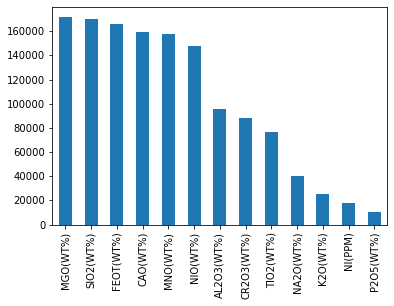

In [7]:
df1 = df[['MGO(WT%)','SIO2(WT%)','FEOT(WT%)','CAO(WT%)','MNO(WT%)','NIO(WT%)','AL2O3(WT%)','CR2O3(WT%)','TIO2(WT%)','NA2O(WT%)','K2O(WT%)','NI(PPM)','P2O5(WT%)']]
df2 = df[['MGO(WT%)','SIO2(WT%)','FEOT(WT%)','CAO(WT%)','MNO(WT%)','NIO(WT%)','AL2O3(WT%)']]
df3 = df[['CR2O3(WT%)','TIO2(WT%)','NA2O(WT%)','K2O(WT%)','NI(PPM)','P2O5(WT%)']]
print(df1.count(axis = 0))
(df1.count(axis = 0)).plot.bar()

In [8]:
df2.describe(percentiles=np.arange(0, 1, 0.03))

,MGO(WT%),SIO2(WT%),FEOT(WT%),CAO(WT%),MNO(WT%),NIO(WT%),AL2O3(WT%)
count,171396.000000,170277.000000,165853.000000,159102.000000,157504.000000,148166.000000,95462.000000
mean,42.738403,39.215618,16.988865,0.417316,0.371249,0.221120,0.068288
std,7.489092,1.885793,8.486794,2.579741,1.096792,0.176255,0.692292
min,0.000000,0.052000,0.000000,0.000000,-0.058549,0.000000,-0.010000
0%,0.000000,0.052000,0.000000,0.000000,-0.058549,0.000000,-0.010000
3%,27.033924,35.730000,7.141956,0.010000,0.090000,0.000000,0.000000
6%,33.138256,36.919998,7.920000,0.027000,0.106472,0.014009,0.000000
9%,35.001202,37.364300,8.470000,0.040000,0.116000,0.030000,0.000000
12%,35.863297,37.635883,8.963120,0.050000,0.125000,0.042000,0.000000
15%,36.950001,37.849998,9.430000,0.063000,0.133000,0.054100,0.000000


In [9]:
df3.describe(percentiles=np.arange(0, 1, 0.03))

,CR2O3(WT%),TIO2(WT%),NA2O(WT%),K2O(WT%),NI(PPM),P2O5(WT%)
count,87881.000000,76680.000000,39980.000000,25302.000000,17848.000000,10764.000000
mean,0.039672,0.037711,0.053504,0.026635,2386.097168,0.033884
std,0.125087,0.260975,0.157132,0.145641,1019.938660,0.106478
min,-0.003200,-0.004800,-0.002070,-0.001860,0.000000,0.000000
0%,-0.003200,-0.004800,-0.002070,-0.001860,0.000000,0.000000
3%,0.000000,0.000000,0.000000,0.000000,599.094482,0.000000
6%,0.000000,0.000000,0.000000,0.000000,911.857178,0.000000
9%,0.000000,0.000000,0.000000,0.000000,1100.000000,0.000000
12%,0.000000,0.000000,0.000000,0.000000,1250.795898,0.000000
15%,0.000000,0.000000,0.000000,0.000000,1398.493408,0.000000


In [10]:
######## 去除每个元素的前后3% ########
df_clear = df.drop(df[(df['MGO(WT%)']<27.033924) | (df['MGO(WT%)']>50.799999)].index)

df_clear = df_clear.drop(df_clear[(df_clear['SIO2(WT%)']<35.73) | (df_clear['SIO2(WT%)']>41.391998)].index)

df_clear = df_clear.drop(df_clear[(df_clear['FEOT(WT%)']<7.141956) | (df_clear['FEOT(WT%)']>31.41)].index)

df_clear = df_clear.drop(df_clear[(df_clear['CAO(WT%)']<0.01) | (df_clear['CAO(WT%)']>0.454258)].index)

df_clear = df_clear.drop(df_clear[(df_clear['MNO(WT%)']<0.09) | (df_clear['MNO(WT%)']>0.703688)].index)

df_clear = df_clear.drop(df_clear[(df_clear['NIO(WT%)']<0) | (df_clear['NIO(WT%)']>0.446801)].index)

df_clear = df_clear.drop(df_clear[(df_clear['AL2O3(WT%)']<0) | (df_clear['AL2O3(WT%)']>0.146544)].index)

df_clear = df_clear.drop(df_clear[(df_clear['CR2O3(WT%)']<0) | (df_clear['CR2O3(WT%)']>0.130000)].index)

df_clear = df_clear.drop(df_clear[(df_clear['TIO2(WT%)']<0) | (df_clear['TIO2(WT%)']>0.180000)].index)

df_clear = df_clear.drop(df_clear[(df_clear['NA2O(WT%)']<0) | (df_clear['NA2O(WT%)']>0.340000)].index)

df_clear = df_clear.drop(df_clear[(df_clear['K2O(WT%)']<0) | (df_clear['K2O(WT%)']>0.140000)].index)

df_clear = df_clear.drop(df_clear[(df_clear['NI(PPM)']<599.094482) | (df_clear['NI(PPM)']>3957.129395)].index)

df_clear = df_clear.drop(df_clear[(df_clear['P2O5(WT%)']<0) | (df_clear['P2O5(WT%)']>0.146544)].index)

MGO(WT%)      129898
SIO2(WT%)     128851
FEOT(WT%)     126030
CAO(WT%)      120575
MNO(WT%)      119129
NIO(WT%)      113747
AL2O3(WT%)     67921
CR2O3(WT%)     66526
TIO2(WT%)      50953
NA2O(WT%)      24691
K2O(WT%)       14664
NI(PPM)        14424
P2O5(WT%)       7313
dtype: int64


<AxesSubplot:>

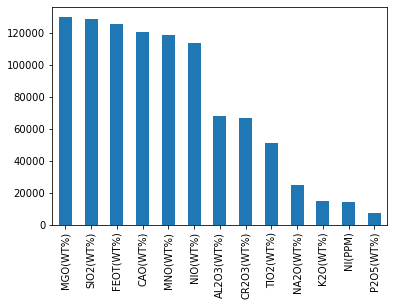

In [11]:
df4 = df_clear[['MGO(WT%)','SIO2(WT%)','FEOT(WT%)','CAO(WT%)','MNO(WT%)','NIO(WT%)','AL2O3(WT%)','CR2O3(WT%)','TIO2(WT%)','NA2O(WT%)','K2O(WT%)','NI(PPM)','P2O5(WT%)']]
print(df4.count(axis = 0))
(df4.count(axis = 0)).plot.bar()

In [12]:
######## MGO ########
df=df_clear
bins = [0,25,30,35,40,45,50,55,100]
df['MGO(WT%)'] = df['MGO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['MGO(WT%)'], bins)

0         (45.0, 50.0]
1         (45.0, 50.0]
2         (40.0, 45.0]
5         (30.0, 35.0]
7         (45.0, 50.0]
              ...     
188808             NaN
188809             NaN
188810             NaN
188811             NaN
188812             NaN
Name: MGO(WT%), Length: 146967, dtype: category
Categories (8, interval[int64]): [(0, 25] < (25, 30] < (30, 35] < (35, 40] < (40, 45] < (45, 50] < (50, 55] < (55, 100]]

In [13]:
df['MGO(WT%)'].groupby(pd.cut(df['MGO(WT%)'], bins)).count()

MGO(WT%)
(0, 25]          0
(25, 30]        55
(30, 35]      5682
(35, 40]     25966
(40, 45]     44937
(45, 50]     48846
(50, 55]      4412
(55, 100]        0
Name: MGO(WT%), dtype: int64

<AxesSubplot:xlabel='MGO(WT%)'>

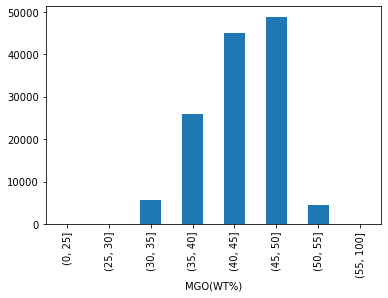

In [14]:
(df['MGO(WT%)'].groupby(pd.cut(df['MGO(WT%)'], bins)).count()).plot.bar()

Text(0.5, 0, 'MGO - MGO mean value (wt%)')

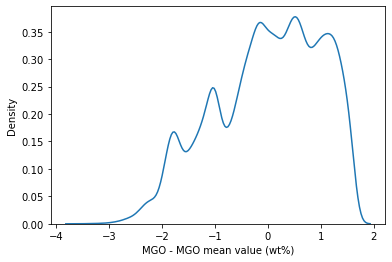

In [15]:
df['MGO(WT%)']=standardization(df['MGO(WT%)'])
sns.kdeplot(df['MGO(WT%)'])
plt.xlabel('MGO - MGO mean value (wt%)',size=10)

In [16]:
######## SIO2 ########
bins = [0,28,30,32,34,36,38,40,42,43,100]
df['SIO2(WT%)'] = df['SIO2(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['SIO2(WT%)'], bins)

0         (38.0, 40.0]
1         (40.0, 42.0]
2         (38.0, 40.0]
5         (36.0, 38.0]
7         (40.0, 42.0]
              ...     
188808             NaN
188809             NaN
188810             NaN
188811             NaN
188812             NaN
Name: SIO2(WT%), Length: 146967, dtype: category
Categories (10, interval[int64]): [(0, 28] < (28, 30] < (30, 32] < (32, 34] ... (38, 40] < (40, 42] < (42, 43] < (43, 100]]

In [96]:
df['SIO2(WT%)'].groupby(pd.cut(df['SIO2(WT%)'], bins)).count()

SIO2(WT%)
(0, 28]          0
(28, 30]         0
(30, 32]         0
(32, 34]         0
(34, 36]       175
(36, 38]     18143
(38, 40]     72094
(40, 42]     38439
(42, 43]         0
(43, 100]        0
Name: SIO2(WT%), dtype: int64

<AxesSubplot:xlabel='SIO2(WT%)'>

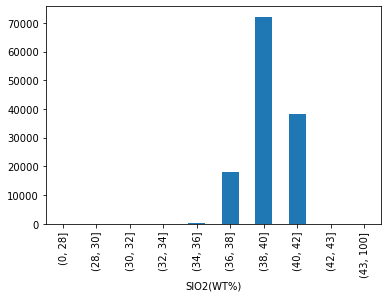

In [97]:
(df['SIO2(WT%)'].groupby(pd.cut(df['SIO2(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='SIO2(WT%)', ylabel='Density'>

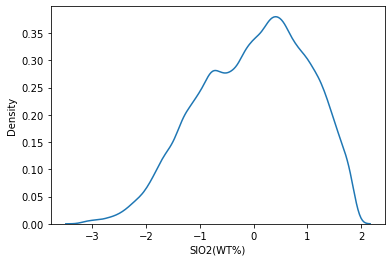

In [98]:
df['SIO2(WT%)']=standardization(df['SIO2(WT%)'])
sns.kdeplot(df['SIO2(WT%)'])

In [99]:
######## FEOT ########
bins = [0,10,20,30,40,50,55,100]
df['FEOT(WT%)'] = df['FEOT(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['FEOT(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
7         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: FEOT(WT%), Length: 146967, dtype: category
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 55] < (55, 100]]

In [100]:
df['FEOT(WT%)'].groupby(pd.cut(df['FEOT(WT%)'], bins)).count()

FEOT(WT%)
(0, 10]      14148
(10, 20]     77468
(20, 30]     33723
(30, 40]       691
(40, 50]         0
(50, 55]         0
(55, 100]        0
Name: FEOT(WT%), dtype: int64

<AxesSubplot:xlabel='FEOT(WT%)'>

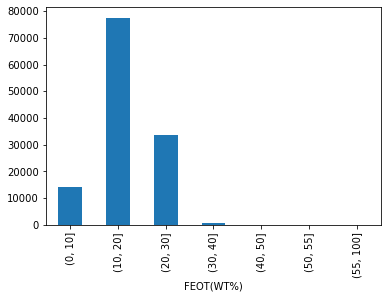

In [101]:
(df['FEOT(WT%)'].groupby(pd.cut(df['FEOT(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='FEO(WT%)', ylabel='Density'>

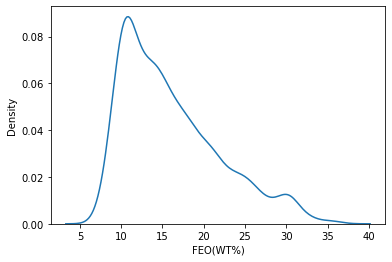

In [102]:
df['FEOT(WT%)']=standardization(df['FEOT(WT%)'])
sns.kdeplot(df['FEO(WT%)'])

In [17]:
######## CAO ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['CAO(WT%)'] = df['CAO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['CAO(WT%)'], bins)

0         (0.2, 0.3]
1         (0.3, 0.4]
2         (0.3, 0.4]
5         (0.3, 0.4]
7         (0.2, 0.3]
             ...    
188808           NaN
188809           NaN
188810           NaN
188811           NaN
188812           NaN
Name: CAO(WT%), Length: 146967, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [18]:
df['CAO(WT%)'].groupby(pd.cut(df['CAO(WT%)'], bins)).count()

CAO(WT%)
(0.0, 0.1]       19415
(0.1, 0.2]       21293
(0.2, 0.3]       44128
(0.3, 0.4]       29749
(0.4, 0.5]        5990
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: CAO(WT%), dtype: int64

<AxesSubplot:xlabel='CAO(WT%)'>

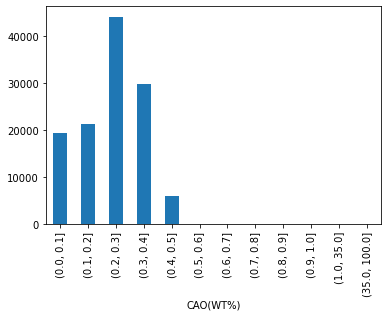

In [19]:
(df['CAO(WT%)'].groupby(pd.cut(df['CAO(WT%)'], bins)).count()).plot.bar()

Text(0.5, 0, 'CAO - CAO mean value (wt%)')

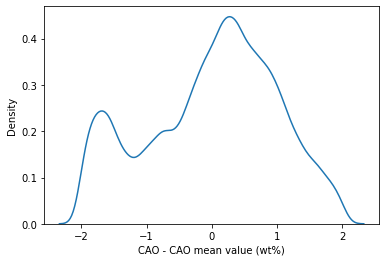

In [21]:
df['CAO(WT%)']=standardization(df['CAO(WT%)'])
sns.kdeplot(df['CAO(WT%)'])
plt.xlabel('CAO - CAO mean value (wt%)',size=10)

In [107]:
######## MNO ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['MNO(WT%)'] = df['MNO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['MNO(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
7         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: MNO(WT%), Length: 146967, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [108]:
df['MNO(WT%)'].groupby(pd.cut(df['MNO(WT%)'], bins)).count()

MNO(WT%)
(0.0, 0.1]         928
(0.1, 0.2]       39696
(0.2, 0.3]       38170
(0.3, 0.4]       15996
(0.4, 0.5]       11215
(0.5, 0.6]        9738
(0.6, 0.7]        3367
(0.7, 0.8]          19
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: MNO(WT%), dtype: int64

<AxesSubplot:xlabel='MNO(WT%)'>

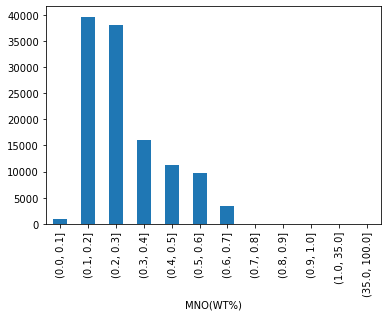

In [109]:
(df['MNO(WT%)'].groupby(pd.cut(df['MNO(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='MNO(WT%)', ylabel='Density'>

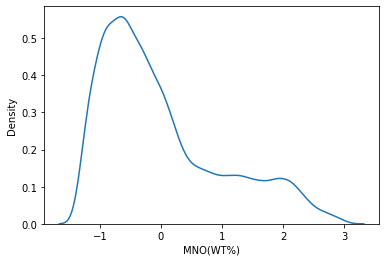

In [110]:
df['MNO(WT%)']=standardization(df['MNO(WT%)'])
sns.kdeplot(df['MNO(WT%)'])

In [111]:
######## NIO ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['NIO(WT%)'] = df['NIO(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['NIO(WT%)'], bins)

0         (0.2, 0.3]
1         (0.2, 0.3]
2         (0.2, 0.3]
5         (0.0, 0.1]
7         (0.3, 0.4]
             ...    
188808           NaN
188809           NaN
188810           NaN
188811           NaN
188812           NaN
Name: NIO(WT%), Length: 146967, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [112]:
df['NIO(WT%)'].groupby(pd.cut(df['NIO(WT%)'], bins)).count()

NIO(WT%)
(0.0, 0.1]       27250
(0.1, 0.2]       26125
(0.2, 0.3]       26406
(0.3, 0.4]       25612
(0.4, 0.5]        5306
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: NIO(WT%), dtype: int64

<AxesSubplot:xlabel='NIO(WT%)'>

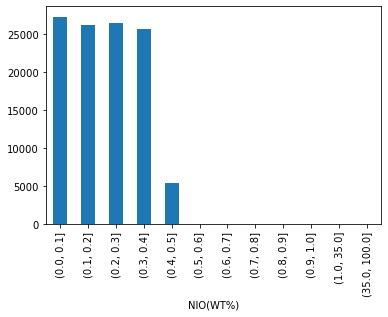

In [113]:
(df['NIO(WT%)'].groupby(pd.cut(df['NIO(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='NIO(WT%)', ylabel='Density'>

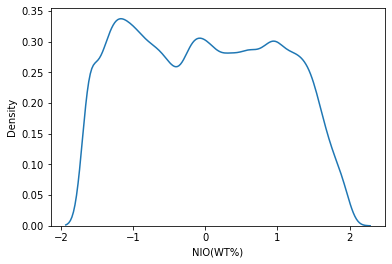

In [114]:
df['NIO(WT%)']=standardization(df['NIO(WT%)'])
sns.kdeplot(df['NIO(WT%)'])

In [115]:
######## AL2O3 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['AL2O3(WT%)'] = df['AL2O3(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['AL2O3(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
7         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: AL2O3(WT%), Length: 146967, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [116]:
df['AL2O3(WT%)'].groupby(pd.cut(df['AL2O3(WT%)'], bins)).count()

AL2O3(WT%)
(0.0, 0.1]       58149
(0.1, 0.2]        1643
(0.2, 0.3]           0
(0.3, 0.4]           0
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: AL2O3(WT%), dtype: int64

<AxesSubplot:xlabel='AL2O3(WT%)'>

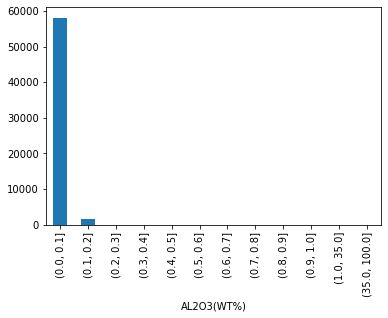

In [117]:
(df['AL2O3(WT%)'].groupby(pd.cut(df['AL2O3(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='AL2O3(WT%)', ylabel='Density'>

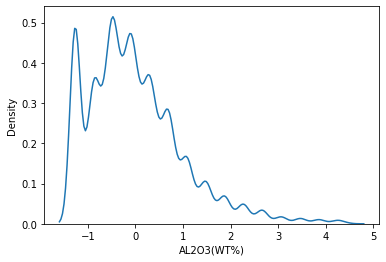

In [120]:
df['AL2O3(WT%)']=standardization(df['AL2O3(WT%)'])
sns.kdeplot(df['AL2O3(WT%)'])

In [121]:
######## CR2O3 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['CR2O3(WT%)'] = df['CR2O3(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['CR2O3(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
7         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: CR2O3(WT%), Length: 146967, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [122]:
df['CR2O3(WT%)'].groupby(pd.cut(df['CR2O3(WT%)'], bins)).count()

CR2O3(WT%)
(0.0, 0.1]       52471
(0.1, 0.2]        2322
(0.2, 0.3]           0
(0.3, 0.4]           0
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: CR2O3(WT%), dtype: int64

<AxesSubplot:xlabel='CR2O3(WT%)'>

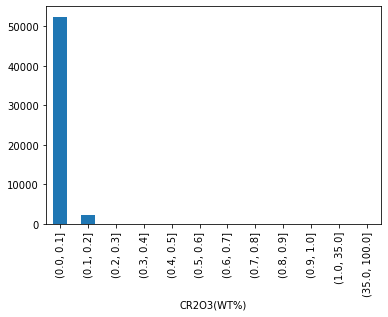

In [123]:
(df['CR2O3(WT%)'].groupby(pd.cut(df['CR2O3(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='CR2O3(WT%)', ylabel='Density'>

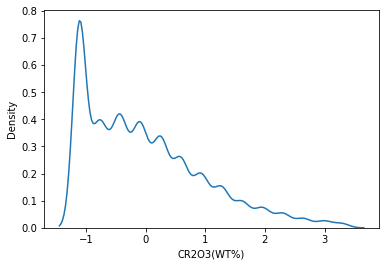

In [124]:
df['CR2O3(WT%)']=standardization(df['CR2O3(WT%)'])
sns.kdeplot(df['CR2O3(WT%)'])

In [125]:
######## TIO2 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['TIO2(WT%)'] = df['TIO2(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['TIO2(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
7         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: TIO2(WT%), Length: 146967, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [126]:
df['TIO2(WT%)'].groupby(pd.cut(df['TIO2(WT%)'], bins)).count()

TIO2(WT%)
(0.0, 0.1]       38719
(0.1, 0.2]        1452
(0.2, 0.3]           0
(0.3, 0.4]           0
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: TIO2(WT%), dtype: int64

<AxesSubplot:xlabel='TIO2(WT%)'>

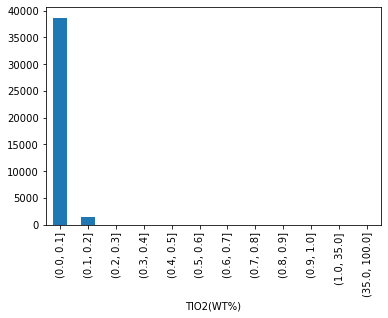

In [127]:
(df['TIO2(WT%)'].groupby(pd.cut(df['TIO2(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='TIO2(WT%)', ylabel='Density'>

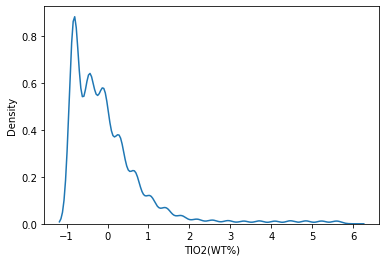

In [128]:
df['TIO2(WT%)']=standardization(df['TIO2(WT%)'])
sns.kdeplot(df['TIO2(WT%)'])

In [129]:
######## NA2O ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['NA2O(WT%)'] = df['NA2O(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['NA2O(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
7         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: NA2O(WT%), Length: 146967, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [130]:
df['NA2O(WT%)'].groupby(pd.cut(df['NA2O(WT%)'], bins)).count()

NA2O(WT%)
(0.0, 0.1]       16574
(0.1, 0.2]         318
(0.2, 0.3]         624
(0.3, 0.4]         345
(0.4, 0.5]           0
(0.5, 0.6]           0
(0.6, 0.7]           0
(0.7, 0.8]           0
(0.8, 0.9]           0
(0.9, 1.0]           0
(1.0, 35.0]          0
(35.0, 100.0]        0
Name: NA2O(WT%), dtype: int64

<AxesSubplot:xlabel='NA2O(WT%)'>

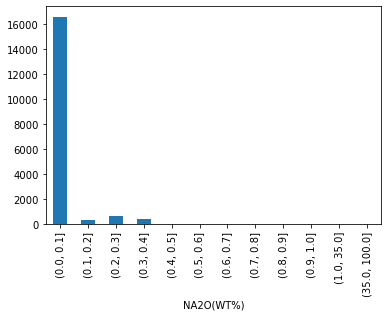

In [131]:
(df['NA2O(WT%)'].groupby(pd.cut(df['NA2O(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='NA2O(WT%)', ylabel='Density'>

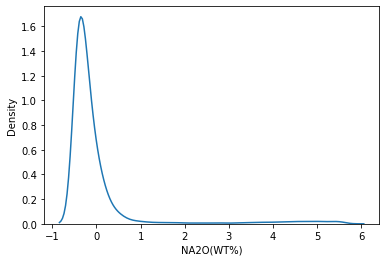

In [136]:
df['NA2O(WT%)']=standardization(df['NA2O(WT%)'])
sns.kdeplot(df['NA2O(WT%)'])

In [137]:
######## K2O ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['K2O(WT%)'] = df['K2O(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['K2O(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
7         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: K2O(WT%), Length: 146967, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [138]:
df['K2O(WT%)'].groupby(pd.cut(df['K2O(WT%)'], bins)).count()

K2O(WT%)
(0.0, 0.1]       6435
(0.1, 0.2]        323
(0.2, 0.3]          0
(0.3, 0.4]          0
(0.4, 0.5]          0
(0.5, 0.6]          0
(0.6, 0.7]          0
(0.7, 0.8]          0
(0.8, 0.9]          0
(0.9, 1.0]          0
(1.0, 35.0]         0
(35.0, 100.0]       0
Name: K2O(WT%), dtype: int64

<AxesSubplot:xlabel='K2O(WT%)'>

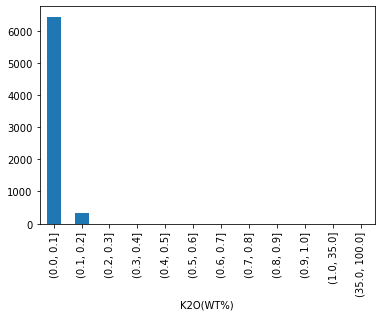

In [139]:
(df['K2O(WT%)'].groupby(pd.cut(df['K2O(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='K2O(WT%)', ylabel='Density'>

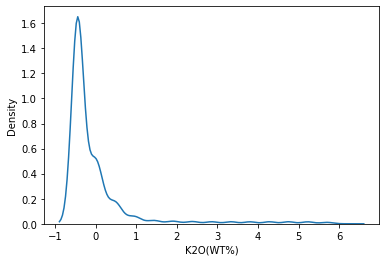

In [140]:
df['K2O(WT%)']=standardization(df['K2O(WT%)'])
sns.kdeplot(df['K2O(WT%)'])

In [141]:
######## NI ########
bins = [0,100,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
df['NI(PPM)'] = df['NI(PPM)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['NI(PPM)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
7         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: NI(PPM), Length: 146967, dtype: category
Categories (11, interval[int64]): [(0, 100] < (100, 1000] < (1000, 2000] < (2000, 3000] ... (6000, 7000] < (7000, 8000] < (8000, 9000] < (9000, 10000]]

In [142]:
df['NI(PPM)'].groupby(pd.cut(df['NI(PPM)'], bins)).count()

NI(PPM)
(0, 100]            0
(100, 1000]       727
(1000, 2000]     4860
(2000, 3000]     6225
(3000, 4000]     2612
(4000, 5000]        0
(5000, 6000]        0
(6000, 7000]        0
(7000, 8000]        0
(8000, 9000]        0
(9000, 10000]       0
Name: NI(PPM), dtype: int64

<AxesSubplot:xlabel='NI(PPM)'>

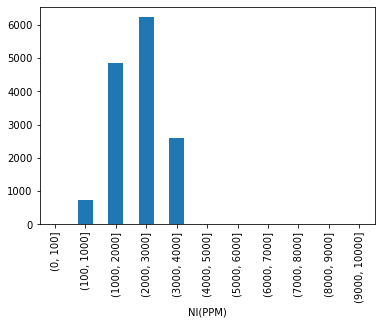

In [143]:
(df['NI(PPM)'].groupby(pd.cut(df['NI(PPM)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='NI(PPM)', ylabel='Density'>

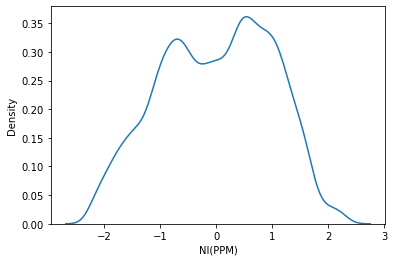

In [144]:
df['NI(PPM)']=standardization(df['NI(PPM)'])
sns.kdeplot(df['NI(PPM)'])

In [145]:
######## P2O5 ########
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,35,100]
df['P2O5(WT%)'] = df['P2O5(WT%)'].apply(pd.to_numeric, downcast='float', errors='coerce')
pd.cut(df['P2O5(WT%)'], bins)

0         NaN
1         NaN
2         NaN
5         NaN
7         NaN
         ... 
188808    NaN
188809    NaN
188810    NaN
188811    NaN
188812    NaN
Name: P2O5(WT%), Length: 146967, dtype: category
Categories (12, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.8, 0.9] < (0.9, 1.0] < (1.0, 35.0] < (35.0, 100.0]]

In [146]:
df['P2O5(WT%)'].groupby(pd.cut(df['P2O5(WT%)'], bins)).count()

P2O5(WT%)
(0.0, 0.1]       6012
(0.1, 0.2]        215
(0.2, 0.3]          0
(0.3, 0.4]          0
(0.4, 0.5]          0
(0.5, 0.6]          0
(0.6, 0.7]          0
(0.7, 0.8]          0
(0.8, 0.9]          0
(0.9, 1.0]          0
(1.0, 35.0]         0
(35.0, 100.0]       0
Name: P2O5(WT%), dtype: int64

<AxesSubplot:xlabel='P2O5(WT%)'>

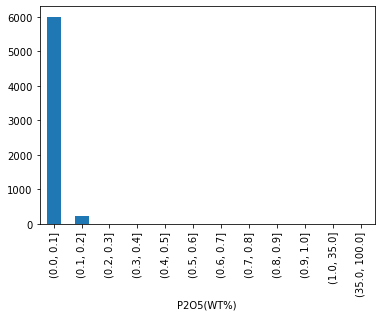

In [147]:
(df['P2O5(WT%)'].groupby(pd.cut(df['P2O5(WT%)'], bins)).count()).plot.bar()

<AxesSubplot:xlabel='P2O5(WT%)', ylabel='Density'>

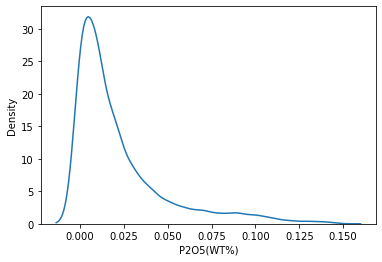

In [148]:
sns.kdeplot(df['P2O5(WT%)'])